In [2]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as ppl
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, confusion_matrix
%matplotlib inline

In [3]:
known_data = pd.read_csv('invasion.csv')
for_prediction = pd.read_csv('operative_information.csv')

In [4]:
known_data.head()

,class,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
0,transport,2.190672,6.716633,62.168208,0.347465,158221,44.932446
1,transport,3.453276,8.995909,62.994707,0.590094,385972,41.568300
2,transport,2.432994,6.938691,62.245807,0.329288,446482,40.123467
3,fighter,6.083763,3.019459,18.474555,0.174738,210125,11.384865
4,fighter,12.876769,2.452950,195.805771,0.150446,23109,11.328806


In [5]:
for_prediction.head()

,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
0,7.516543,3.916691,513.954279,0.177247,105908,13.267224
1,4.322988,6.967689,63.752970,0.545922,277855,39.833130
2,4.595724,9.098297,62.233948,0.389201,160662,42.014556
3,2.689675,7.964869,62.475495,0.541081,162092,42.056829
4,8.075576,5.169719,336.441261,0.174757,466853,11.779813


In [22]:
X_train = known_data.iloc[:, 1:]
transport = {'transport' :  0,  'fighter' :  1,  'cruiser' : 2}
y_train = known_data['class'].map(transport)

In [23]:
clf_forest = RandomForestClassifier()
params = {
'n_estimators':range(1, 10),
'max_depth':range(1,13,2),
'min_samples_leaf':range(1,8),
'min_samples_split':range(2,10,2)   
}
searching_best_comb = GridSearchCV(clf_forest, params, cv=5, verbose=1, n_jobs=-1)
searching_best_comb.fit(X_train, y_train)

Fitting 5 folds for each of 1512 candidates, totalling 7560 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(1, 13, 2),
                         'min_samples_leaf': range(1, 8),
                         'min_samples_split': range(2, 10, 2),
                         'n_estimators': range(1, 10)},
             verbose=1)

In [24]:
clf = searching_best_comb.best_estimator_

<Axes: >

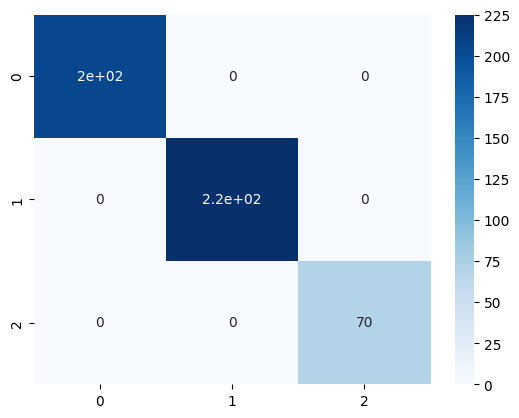

In [25]:
matrix = confusion_matrix(y_train, clf.predict(X_train))
sns.heatmap(matrix, annot=True, cmap="Blues")

In [30]:
prediction = pd.Series(clf.predict(for_prediction))

In [40]:
result = prediction.groupby(prediction).count().rename({int(value): key for key, value in transport.items()})

In [47]:
result

transport    595
fighter      675
cruiser      230
dtype: int64

In [50]:
pd.DataFrame({'feature': list(X_train), 'importance': clf.feature_importances_}).sort_values('importance', ascending=False)

,feature,importance
5,volume,0.472285
3,brightness,0.207405
2,speed,0.158717
1,i_reflection,0.136908
0,g_reflection,0.024685
4,time_of_observance,0.000000
